                                                        CHURN - DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                                                        EDA PROCESS       

In [2]:
df=pd.read_csv(r"D:\DATA\Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(["RowNumber"],axis=1,inplace=True)
df

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

  DATA ENCODING

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
for i in ["Surname","Geography","Gender"]:
    df[i]=le.fit_transform(df[i])
df[i]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

DATA SCALING

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [9]:
y=df.drop(["Age","CustomerId","Surname","Geography","Gender","Exited"],axis=1)
x=df.drop(["CreditScore","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"],axis=1)

In [10]:
y.head()

CreditScore  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          619       2       0.00              1          1               1   
1          608       1   83807.86              1          0               1   
2          502       8  159660.80              3          1               0   
3          699       1       0.00              2          0               0   
4          850       2  125510.82              1          1               1   

   EstimatedSalary  
0        101348.88  
1        112542.58  
2        113931.57  
3         93826.63  
4         79084.10

In [11]:
z=minmax.fit_transform(y)
z

array([[0.538     , 0.2       , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 0.1       , 0.33403148, ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.8       , 0.63635718, ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.7       , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.3       , 0.29922631, ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.4       , 0.51870777, ..., 1.        , 0.        ,
        0.19091423]])

In [12]:
z=pd.DataFrame(z,columns=["CreditScore","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"])
z

CreditScore  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0           0.538     0.2  0.000000       0.000000        1.0             1.0   
1           0.516     0.1  0.334031       0.000000        0.0             1.0   
2           0.304     0.8  0.636357       0.666667        1.0             0.0   
3           0.698     0.1  0.000000       0.333333        0.0             0.0   
4           1.000     0.2  0.500246       0.000000        1.0             1.0   
...           ...     ...       ...            ...        ...             ...   
9995        0.842     0.5  0.000000       0.333333        1.0             0.0   
9996        0.332     1.0  0.228657       0.000000        1.0             1.0   
9997        0.718     0.7  0.000000       0.000000        0.0             1.0   
9998        0.844     0.3  0.299226       0.333333        1.0             0.0   
9999        0.884     0.4  0.518708       0.000000        1.0             0.0   

      EstimatedSalary  
0            0.506735  
1            0.562709  
2            0.569654  
3            0.469120  
4            0.395400  
...               ...  
9995         0.481341  
9996         0.508490  
9997         0.210390  
9998         0.464429  
9999         0.190914  

[10000 rows x 7 columns]

In [13]:
final_df=pd.concat([z,x],axis=1)
final_df

CreditScore  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0           0.538     0.2  0.000000       0.000000        1.0             1.0   
1           0.516     0.1  0.334031       0.000000        0.0             1.0   
2           0.304     0.8  0.636357       0.666667        1.0             0.0   
3           0.698     0.1  0.000000       0.333333        0.0             0.0   
4           1.000     0.2  0.500246       0.000000        1.0             1.0   
...           ...     ...       ...            ...        ...             ...   
9995        0.842     0.5  0.000000       0.333333        1.0             0.0   
9996        0.332     1.0  0.228657       0.000000        1.0             1.0   
9997        0.718     0.7  0.000000       0.000000        0.0             1.0   
9998        0.844     0.3  0.299226       0.333333        1.0             0.0   
9999        0.884     0.4  0.518708       0.000000        1.0             0.0   

      EstimatedSalary  CustomerId  Surname  Geography  Gender  Age  Exited  
0            0.506735    15634602     1115          0       0   42       1  
1            0.562709    15647311     1177          2       0   41       0  
2            0.569654    15619304     2040          0       0   42       1  
3            0.469120    15701354      289          0       0   39       0  
4            0.395400    15737888     1822          2       0   43       0  
...               ...         ...      ...        ...     ...  ...     ...  
9995         0.481341    15606229     1999          0       1   39       0  
9996         0.508490    15569892     1336          0       1   35       0  
9997         0.210390    15584532     1570          0       0   36       1  
9998         0.464429    15682355     2345          1       1   42       1  
9999         0.190914    15628319     2751          0       0   28       0  

[10000 rows x 13 columns]

 DATA VISUALIZATION

In [14]:
final_df['IsActiveMember'] = final_df['IsActiveMember'].astype(str)

In [15]:
final_df['HasCrCard'] = final_df['HasCrCard'].astype(str)

<Axes: xlabel='Tenure', ylabel='count'>

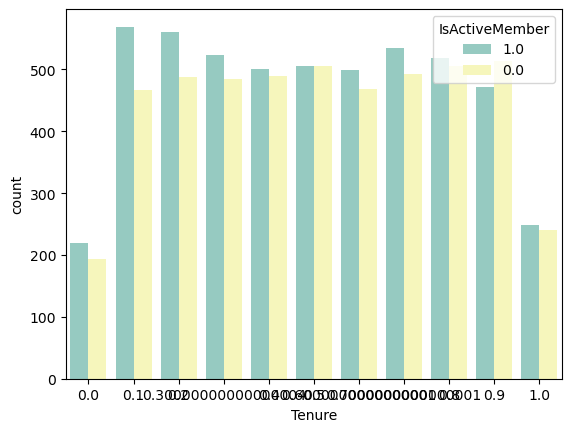

In [16]:
sns.countplot(x="Tenure",palette="Set3",hue="IsActiveMember",data=final_df)

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

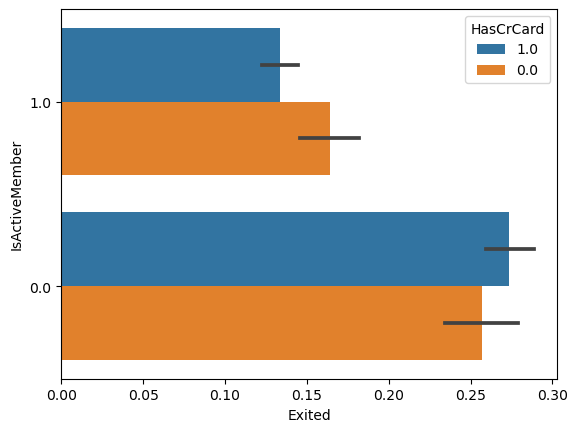

In [17]:
sns.barplot(x="Exited",y="IsActiveMember",hue="HasCrCard",data=final_df)


C:\Users\amalj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amalj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amalj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amalj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

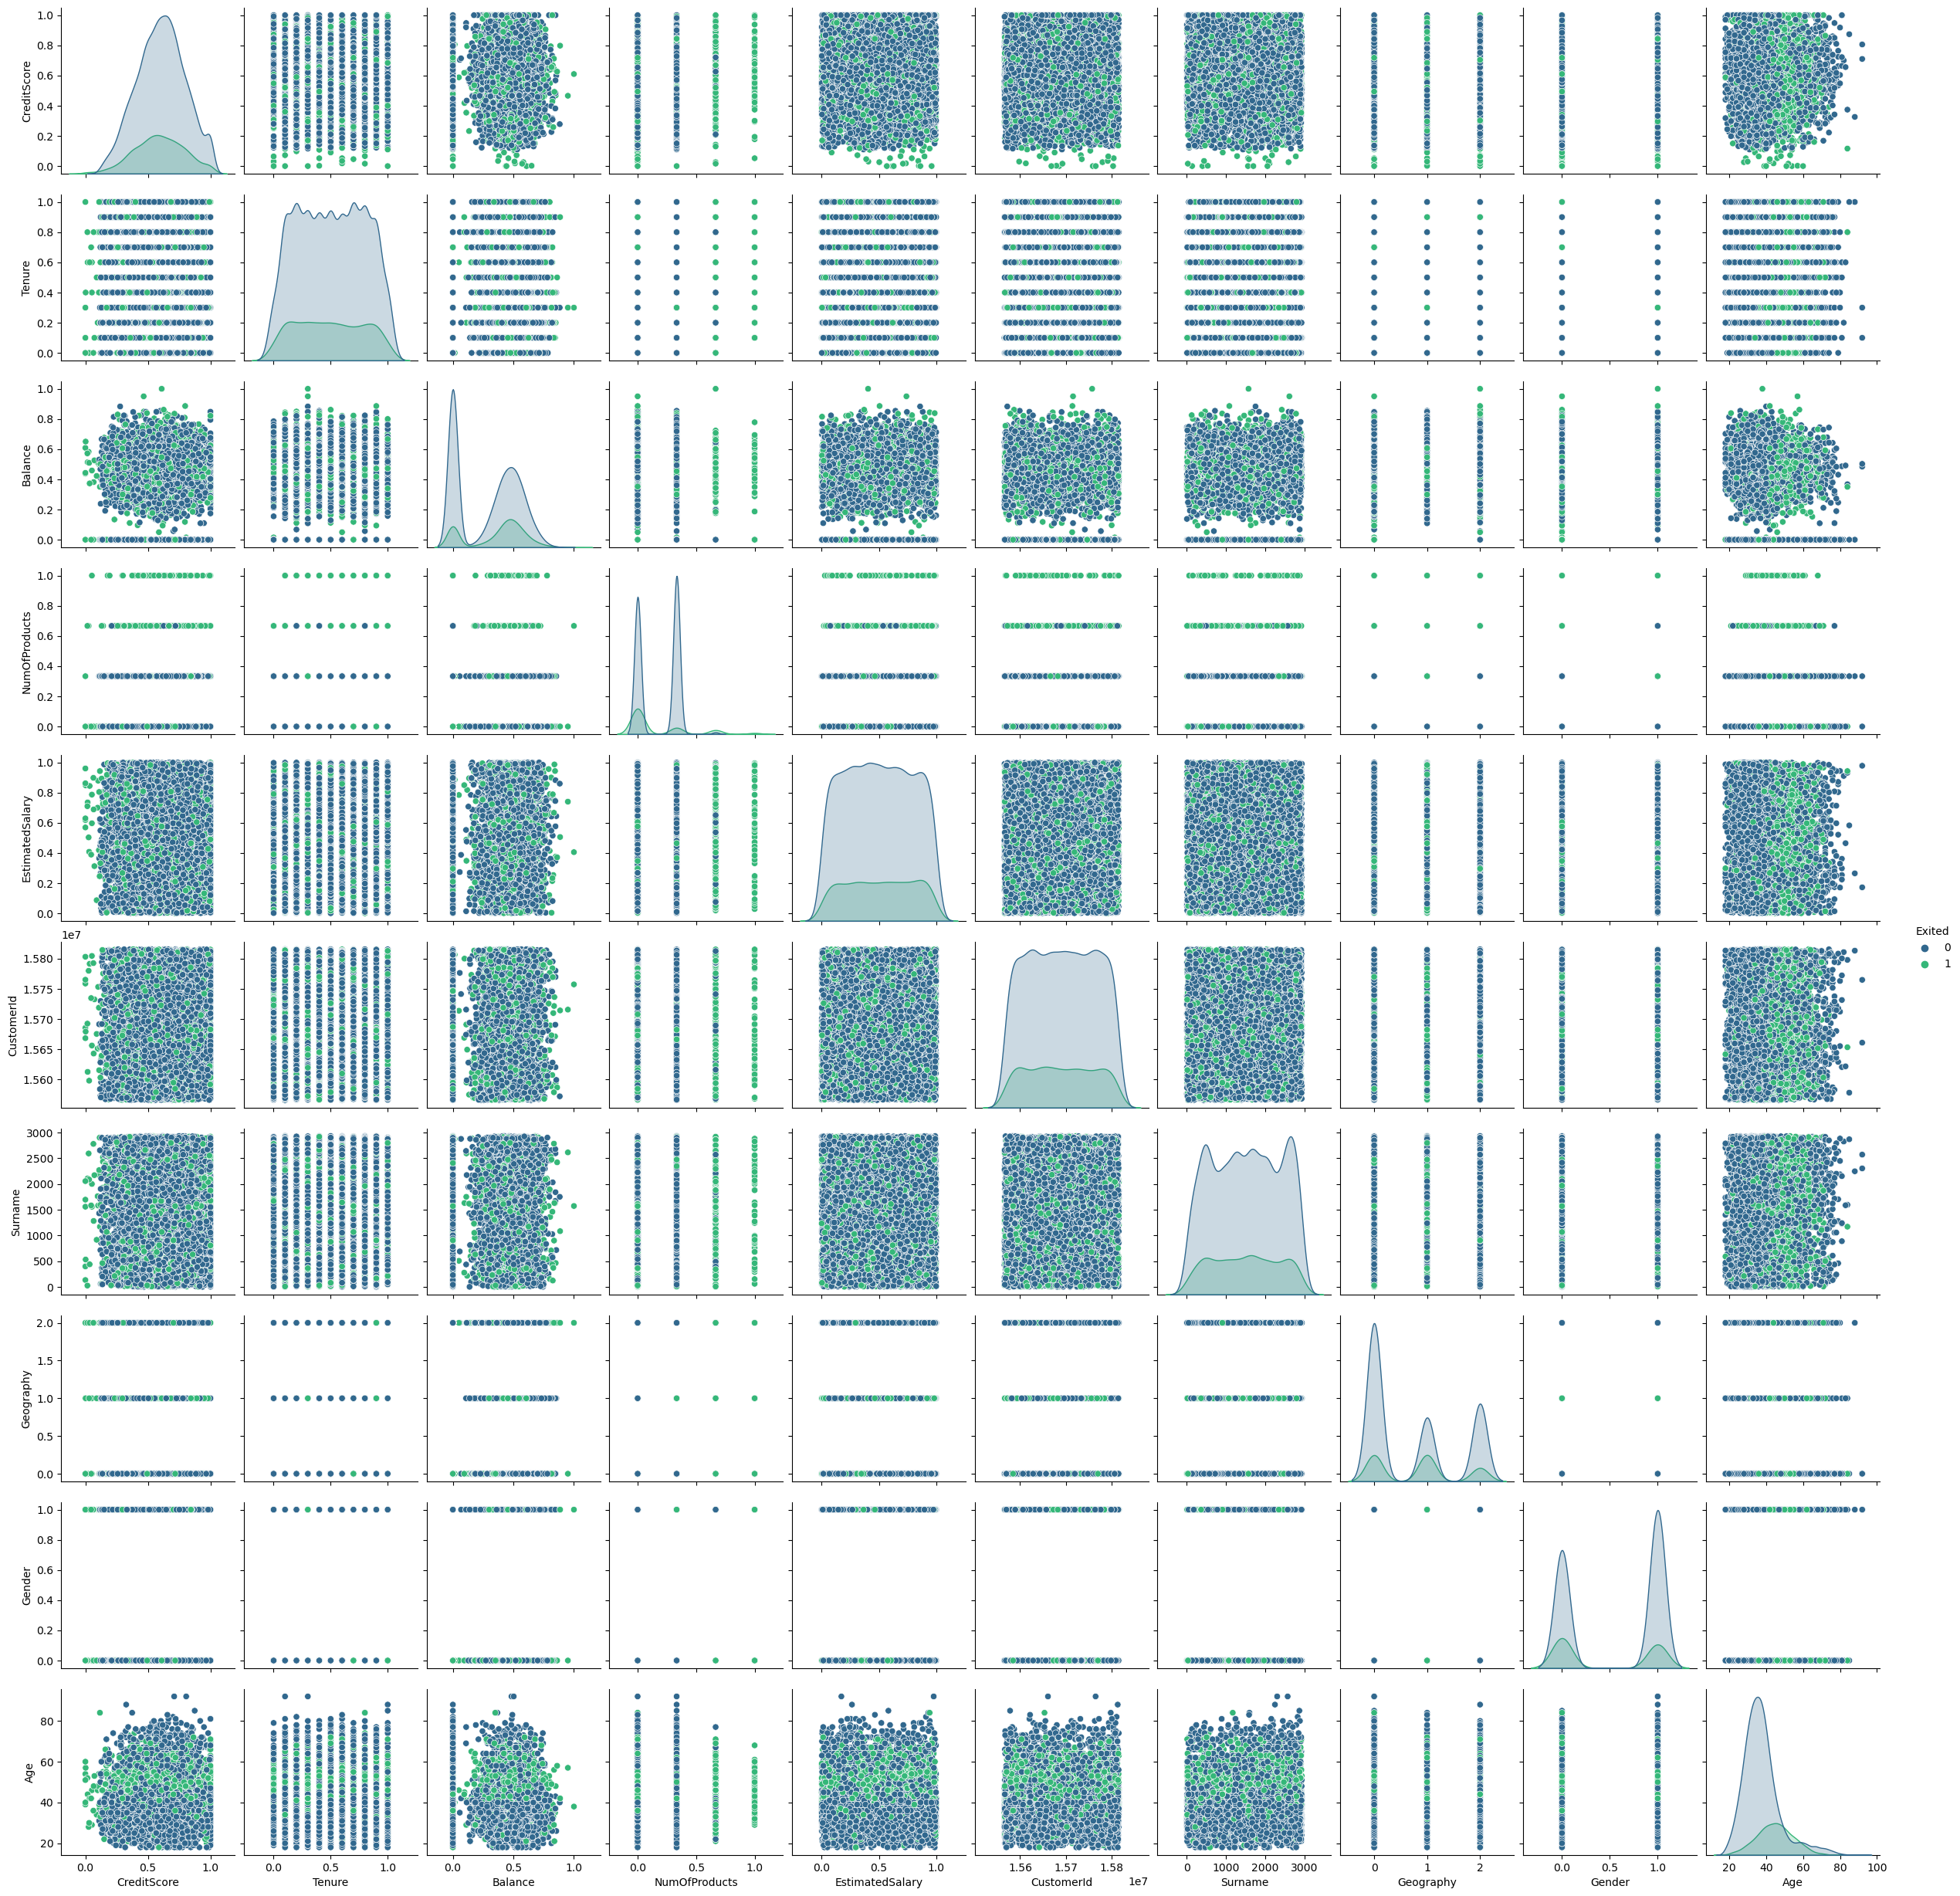

In [18]:
sns.pairplot(final_df,hue="Exited",palette="viridis")

C:\Users\amalj\AppData\Local\Temp\ipykernel_22632\233550812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['CreditScore'],color="r",kde=False,bins=10)


<Axes: xlabel='CreditScore'>

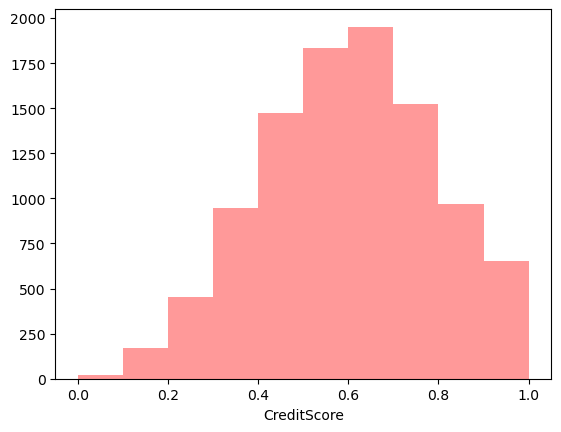

In [19]:
sns.distplot(final_df['CreditScore'],color="r",kde=False,bins=10)

<Axes: >

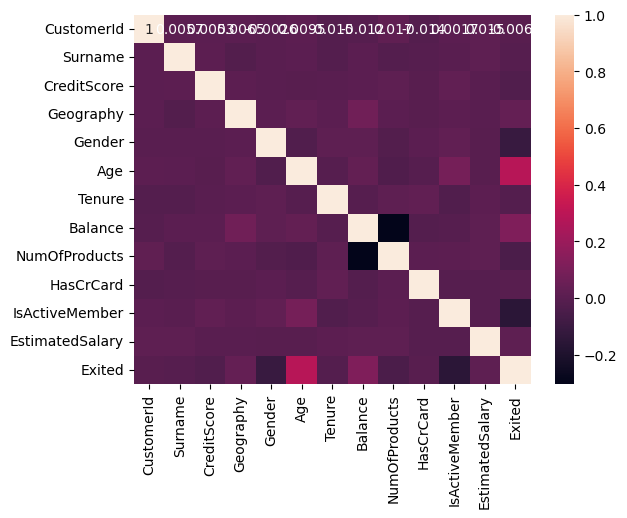

In [20]:
sns.heatmap(df.corr(),annot=True)

                                                        MODEL CHECKING

In [21]:
y=final_df['Exited']
x=final_df.drop('Exited',axis=1)
print(y)
print(x)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64
      CreditScore  Tenure   Balance  NumOfProducts HasCrCard IsActiveMember  \
0           0.538     0.2  0.000000       0.000000       1.0            1.0   
1           0.516     0.1  0.334031       0.000000       0.0            1.0   
2           0.304     0.8  0.636357       0.666667       1.0            0.0   
3           0.698     0.1  0.000000       0.333333       0.0            0.0   
4           1.000     0.2  0.500246       0.000000       1.0            1.0   
...           ...     ...       ...            ...       ...            ...   
9995        0.842     0.5  0.000000       0.333333       1.0            0.0   
9996        0.332     1.0  0.228657       0.000000       1.0            1.0   
9997        0.718     0.7  0.000000       0.000000       0.0            1.0   
9998        0.844     0.3  0.299226       0.333333       1

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      CreditScore  Tenure   Balance  NumOfProducts HasCrCard IsActiveMember  \
4901        0.646     0.0  0.709683       0.333333       0.0            1.0   
4375        1.000     0.8  0.242651       0.000000       1.0            0.0   
6698        0.750     0.6  0.000000       0.000000       0.0            0.0   
9805        0.588     0.7  0.695786       0.000000       0.0            1.0   
1101        0.706     0.9  0.000000       0.333333       1.0            0.0   
...           ...     ...       ...            ...       ...            ...   
5734        0.836     0.8  0.277853       0.000000       1.0            1.0   
5191        0.664     0.1  0.000000       0.000000       1.0            1.0   
5390        0.770     0.1  0.000000       0.666667       0.0            0.0   
860         0.634     0.8  0.758186       0.000000       1.0            0.0   
7270        0.694     0.1  0.589523       0.000000       1.0            1.0   

      EstimatedSalary  CustomerId  Surname  Geograp

>1. LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
4862    0
7025    1
7647    0
7161    0
73      0
Name: Exited, Length: 2500, dtype: int64

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8012


>2. KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(1, 10)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model_knn=knn.fit(x_train,y_train)
    y_pred_knn=model_knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

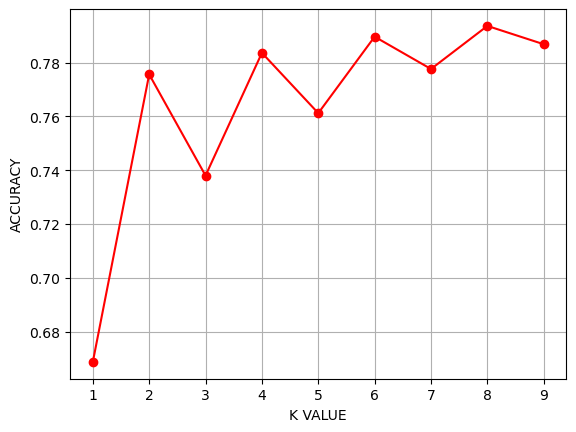

In [29]:
plt.plot(neighbors,metric_k,"ro-",)
plt.xlabel("K VALUE")
plt.ylabel("ACCURACY")
plt.grid()

In [30]:
knn=KNeighborsClassifier(n_neighbors=8)
model_knn=knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_knn))

0.7936


>3. SVM

In [32]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_svm))

0.8012


>4. DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_dt))

0.7828


>5. RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_rf))

0.868


In [38]:
x.head()

CreditScore  Tenure   Balance  NumOfProducts HasCrCard IsActiveMember  \
0        0.538     0.2  0.000000       0.000000       1.0            1.0   
1        0.516     0.1  0.334031       0.000000       0.0            1.0   
2        0.304     0.8  0.636357       0.666667       1.0            0.0   
3        0.698     0.1  0.000000       0.333333       0.0            0.0   
4        1.000     0.2  0.500246       0.000000       1.0            1.0   

   EstimatedSalary  CustomerId  Surname  Geography  Gender  Age  
0         0.506735    15634602     1115          0       0   42  
1         0.562709    15647311     1177          2       0   41  
2         0.569654    15619304     2040          0       0   42  
3         0.469120    15701354      289          0       0   39  
4         0.395400    15737888     1822          2       0   43

In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
rf_model.predict([[0.516,	0.1,	0.334031,	0.000000,	0.0,	1.0,	0.562709,	15647311,	1177	,2	,0	,41]])

C:\Users\amalj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [41]:
rf_model.predict([[0.304,	0.8,	0.636357,	0.666667,	1.0,	0.0,	0.569654,	15619304,	2040,	0	,0,	42]])

C:\Users\amalj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

>6. NAIVE BAYES

In [42]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train,y_train)
predict1 = model1.predict(x_test)
predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(x_train,y_train)
predict2 = model2.predict(x_test)
predict2

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [44]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(x_train,y_train)
predict3 = model3.predict(x_test)
predict3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
acc_score1=accuracy_score(y_test,predict1)
acc_score2=accuracy_score(y_test,predict2)
acc_score3=accuracy_score(y_test,predict3)
print(acc_score1)
print(acc_score2)
print(acc_score3)

0.7784
0.5368
0.7952


>7. BOOSTING

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
final_df['HasCrCard'] = final_df['HasCrCard'].astype('category')
final_df['IsActiveMember'] = final_df['IsActiveMember'].astype('category')


a) ADA BOOSTING

In [52]:
from sklearn.ensemble import AdaBoostClassifier
model_ada= AdaBoostClassifier()
model_ada.fit(x_train,y_train)
pred_ada= model_ada.predict(x_test)
pred_ada

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_ada)

0.8556

b) XG BOOSTING

In [54]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)
pred_xgb = model_xgb.predict(x_test)
pred_xgb

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:HasCrCard: object, IsActiveMember: object

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_xgb)

c) GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gra= GradientBoostingClassifier()
model_gra.fit(x_train,y_train)
pred_gra = model_gra.predict(x_test)
pred_gra

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_gra)

                                                        PERFORMANCE CHART

In [ ]:
labels = 'Decision Tree', 'Logistic Regression', 'K-NN', 'Random Forest','Support Vector Machine',"naive bayes","Boosting"
sizes = [78, 80, 79, 86,80,79,86]
colors = ['violet', 'yellow','blue', 'red', 'cyan','green',"white"]
explode= (0, 0, 0, 0.1,0,0,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True,startangle=140)


plt.axis('equal')
plt.show()

>CONCLUSION